In [1]:
'''Data Visualization '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be most helpful?

Line graph
Bar chart
Box plot
Histogram
Heat map
Scatter plot
A geographic map

As you'll see below, a bar chart, box plot and scatter plot will be most helpful in your understanding of this data.

A box plot will be helpful to determine outliers and where the bulk of the data points reside in terms of trip_distance, duration, and total_amount

A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables, such as trip_distance and total_amount

A bar chart will help determine average number of trips per month, weekday, weekend, etc.

In [2]:
df = pd.read_csv("taxidataset.csv")
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


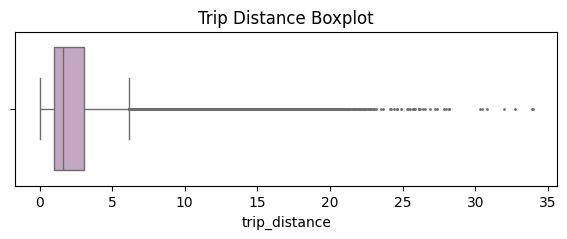

In [11]:
#constructing a boxplot

# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('Trip Distance Boxplot')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1, color='#C8A2C8');

<Axes: title={'center': 'Trip_distance Histogram'}, xlabel='trip_distance', ylabel='Count'>

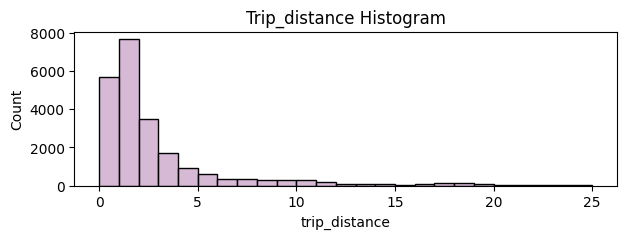

In [10]:
# Create histogram of trip_distance
plt.figure(figsize=(7,2))
plt.title('Trip_distance Histogram')
sns.histplot(df['trip_distance'], bins=range(0,26,1), color='#C8A2C8')

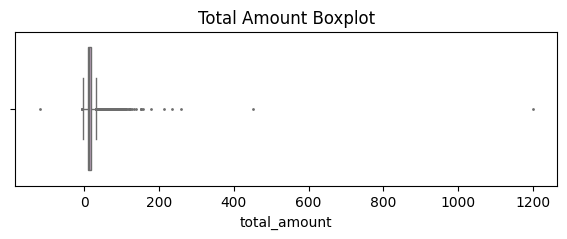

In [12]:
#total_amount visualization
plt.figure(figsize=(7,2))
plt.title('Total Amount Boxplot')
sns.boxplot(data=None, x=df['total_amount'], fliersize=1, color='#C8A2C8');

<Axes: title={'center': 'Total Amount Histogram'}, xlabel='total_amount', ylabel='Count'>

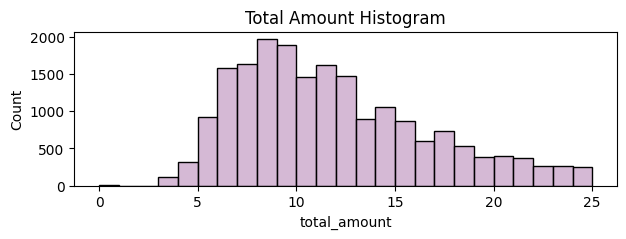

In [13]:
plt.figure(figsize=(7,2))
plt.title('Total Amount Histogram')
sns.histplot(df['total_amount'], bins=range(0,26,1), color='#C8A2C8')

<Axes: title={'center': 'Tip Amount Boxplot'}, xlabel='tip_amount'>

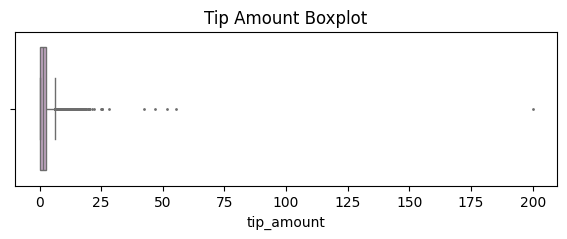

In [14]:
#tip amount visualization
plt.figure(figsize=(7,2))
plt.title('Tip Amount Boxplot')
sns.boxplot(data=None, x=df['tip_amount'],fliersize=1, color='#C8A2C8')

<Axes: title={'center': 'Tip Amount Histogram'}, xlabel='tip_amount', ylabel='Count'>

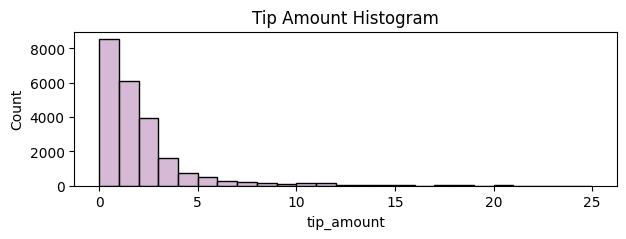

In [15]:
plt.figure(figsize=(7, 2))
plt.title('Tip Amount Histogram')
sns.histplot(df['tip_amount'], bins=range(0, 26, 1), color='#C8A2C8')

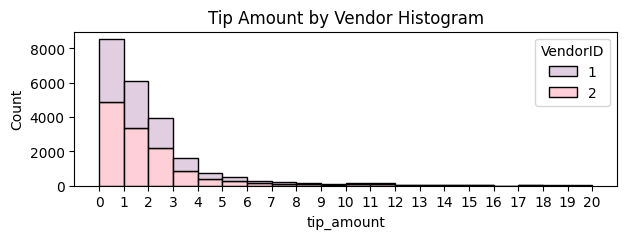

In [20]:
plt.figure(figsize=(7,2))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette=['#D8BFD8', '#FFC0CB'])  
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip Amount by Vendor Histogram')
plt.show()

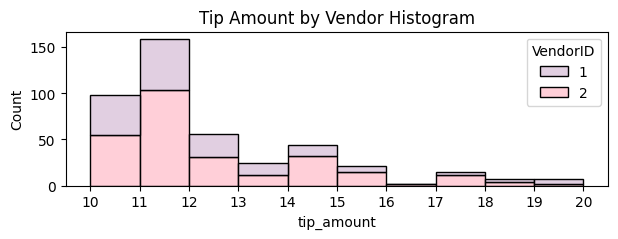

In [21]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(7,2))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette=['#D8BFD8', '#FFC0CB'])
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip Amount by Vendor Histogram');

In [22]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [25]:
mean_tips_by_passenger_count = df.groupby(['passenger_count'])['tip_amount'].mean()
print(mean_tips_by_passenger_count)

passenger_count
0    2.135758
1    1.848920
2    1.856378
3    1.716768
4    1.530264
5    1.873185
6    1.720260
Name: tip_amount, dtype: float64


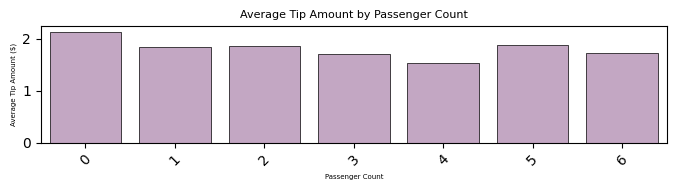

   passenger_count  tip_amount
0                0    2.135758
1                1    1.848920
2                2    1.856378
3                3    1.716768
4                4    1.530264
5                5    1.873185
6                6    1.720260


In [40]:
# First ensure the columns exist and handle any potential errors
if {'passenger_count', 'tip_amount'}.issubset(df.columns):
    # Calculate mean tips by passenger count
    mean_tips_by_passenger_count = df.groupby('passenger_count')['tip_amount'].mean().reset_index()
    
    plt.figure(figsize=(7, 2))
    ax = sns.barplot(x='passenger_count', 
                    y='tip_amount', 
                    data=mean_tips_by_passenger_count,
                    color='#C8A2C8',
                    edgecolor='black',  
                    linewidth=0.5) 
    
    # Customize the plot
    ax.set_title('Average Tip Amount by Passenger Count', fontsize=8)
    ax.set_xlabel('Passenger Count', fontsize=5)
    ax.set_ylabel('Average Tip Amount ($)', fontsize=5)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print(mean_tips_by_passenger_count)
else:
    print("Error: Required columns ('passenger_count' and/or 'tip_amount') not found in DataFrame")

In [33]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [34]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

In [35]:
# Show the index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

C:\Users\hp\AppData\Local\Temp\ipykernel_19484\581364554.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=monthly_rides.index,
C:\Users\hp\AppData\Local\Temp\ipykernel_19484\581364554.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order, fontsize=12)
C:\Users\hp\AppData\Local\Temp\ipykernel_19484\581364554.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(y) for y in ax.get_yticks()], fontsize=12)


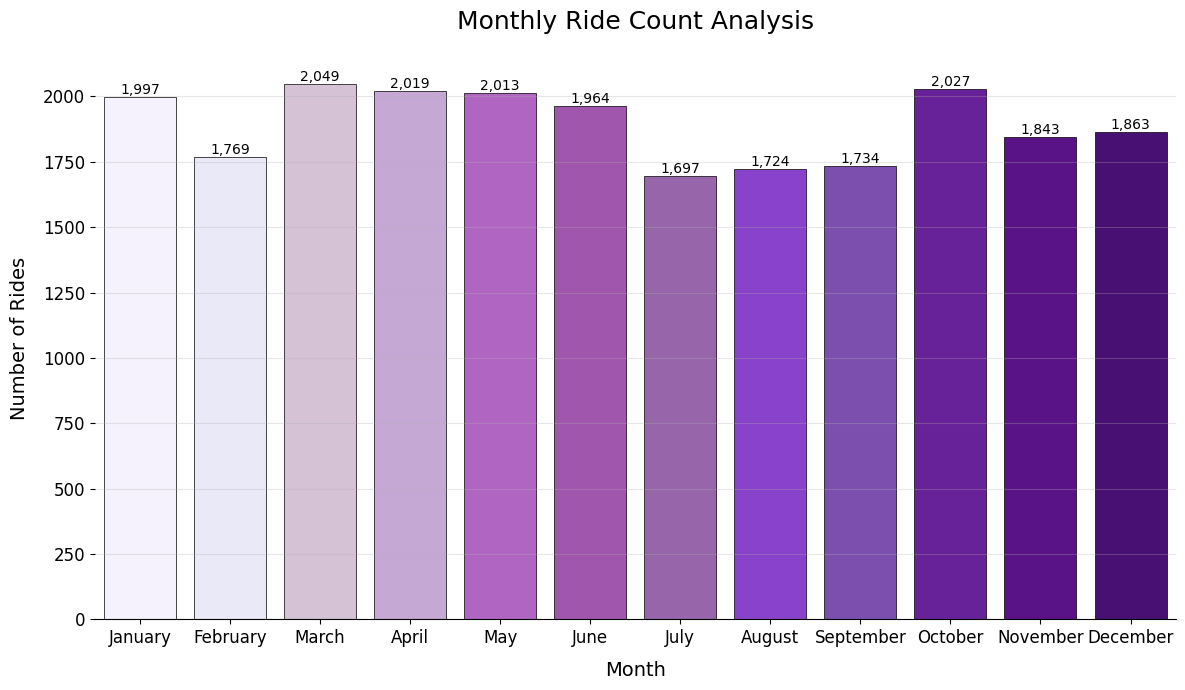

In [39]:
purple_palette = sns.color_palette([
    '#F5F0FF',  # Very pale lavender
    '#E6E6FA',  # Lavender
    '#D8BFD8',  # Thistle
    '#C9A0DC',  # Wisteria
    '#BA55D3',  # Medium orchid
    '#AB47BC',  # Rich lavender
    '#9B59B6',  # Amethyst
    '#8A2BE2',  # Blue violet
    '#7B3FBF',  # Royal purple
    '#6A0DAD',  # Bright violet
    '#5D0099',  # Deep purple
    '#4B0082'   # Indigo
], n_colors=12)  

plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, 
                 y=monthly_rides, 
                 palette=purple_palette,
                 edgecolor='black',  
                 linewidth=0.5)      

# Enhanced formatting
ax.set_xticklabels(month_order, fontsize=12)
ax.set_yticklabels([int(y) for y in ax.get_yticks()], fontsize=12)
plt.title('Monthly Ride Count Analysis', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Number of Rides', fontsize=14, labelpad=10)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10)

plt.grid(axis='y', alpha=0.3)  # Light horizontal grid
sns.despine(left=True)        # Cleaner look
plt.tight_layout()
plt.show()

In [41]:
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_19484\2122240633.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=daily_rides.index,
C:\Users\hp\AppData\Local\Temp\ipykernel_19484\2122240633.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order, fontsize=12, fontweight='bold')


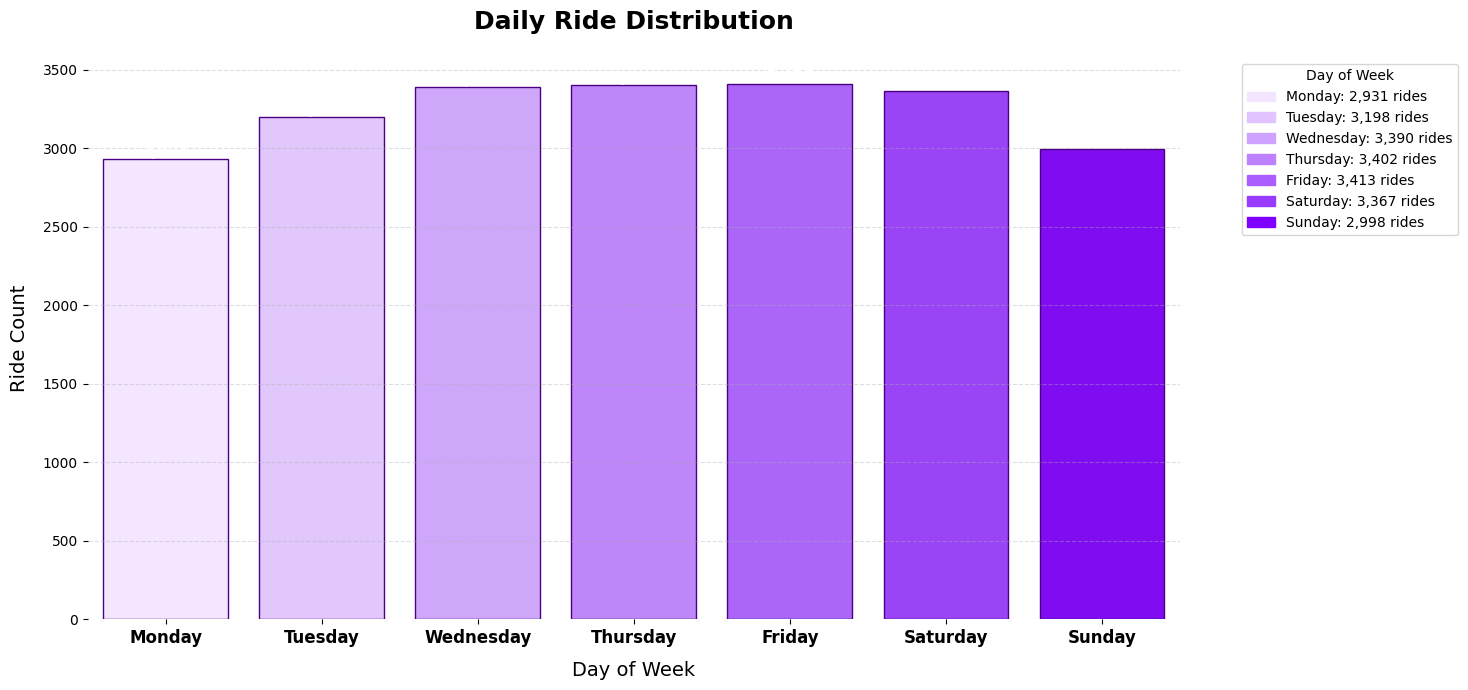

In [45]:
day_purples = sns.color_palette([
    '#F3E5FF',  # Very pale lavender (Sunday)
    '#E1C4FF',  # Pastel purple
    '#CFA2FF',  # Light lilac
    '#BD80FF',  # Soft violet
    '#AB5EFF',  # Medium purple
    '#993AFF',  # Bright purple
    '#8000FF'   # Deep purple (Saturday)
], n_colors=7)  

plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, 
                 y=daily_rides,
                 palette=day_purples,
                 edgecolor='#4B0082',  
                 linewidth=1,          
                 saturation=0.9)       

# Enhanced formatting
ax.set_xticklabels(day_order, fontsize=12, fontweight='bold')
ax.set_ylabel('Ride Count', fontsize=14, labelpad=10)
ax.set_xlabel('Day of Week', fontsize=14, labelpad=10)
plt.title('Daily Ride Distribution', fontsize=18, pad=20, fontweight='bold')

# Add value labels with white text for contrast
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=11,
                color='white',
                fontweight='bold')

# Style improvements
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Add legend explaining color intensity
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=day_purples[i], 
                                label=f"{day}: {daily_rides.iloc[i]:,} rides") 
                 for i, day in enumerate(day_order)]
plt.legend(handles=legend_patches, 
           title='Day of Week',
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')

plt.show()

In [47]:
# Repeat the process, this time for total revenue by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day')[['total_amount']].sum()
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


C:\Users\hp\AppData\Local\Temp\ipykernel_19484\3655430468.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_amount_day.index,
C:\Users\hp\AppData\Local\Temp\ipykernel_19484\3655430468.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order, fontsize=13, fontweight='semibold')


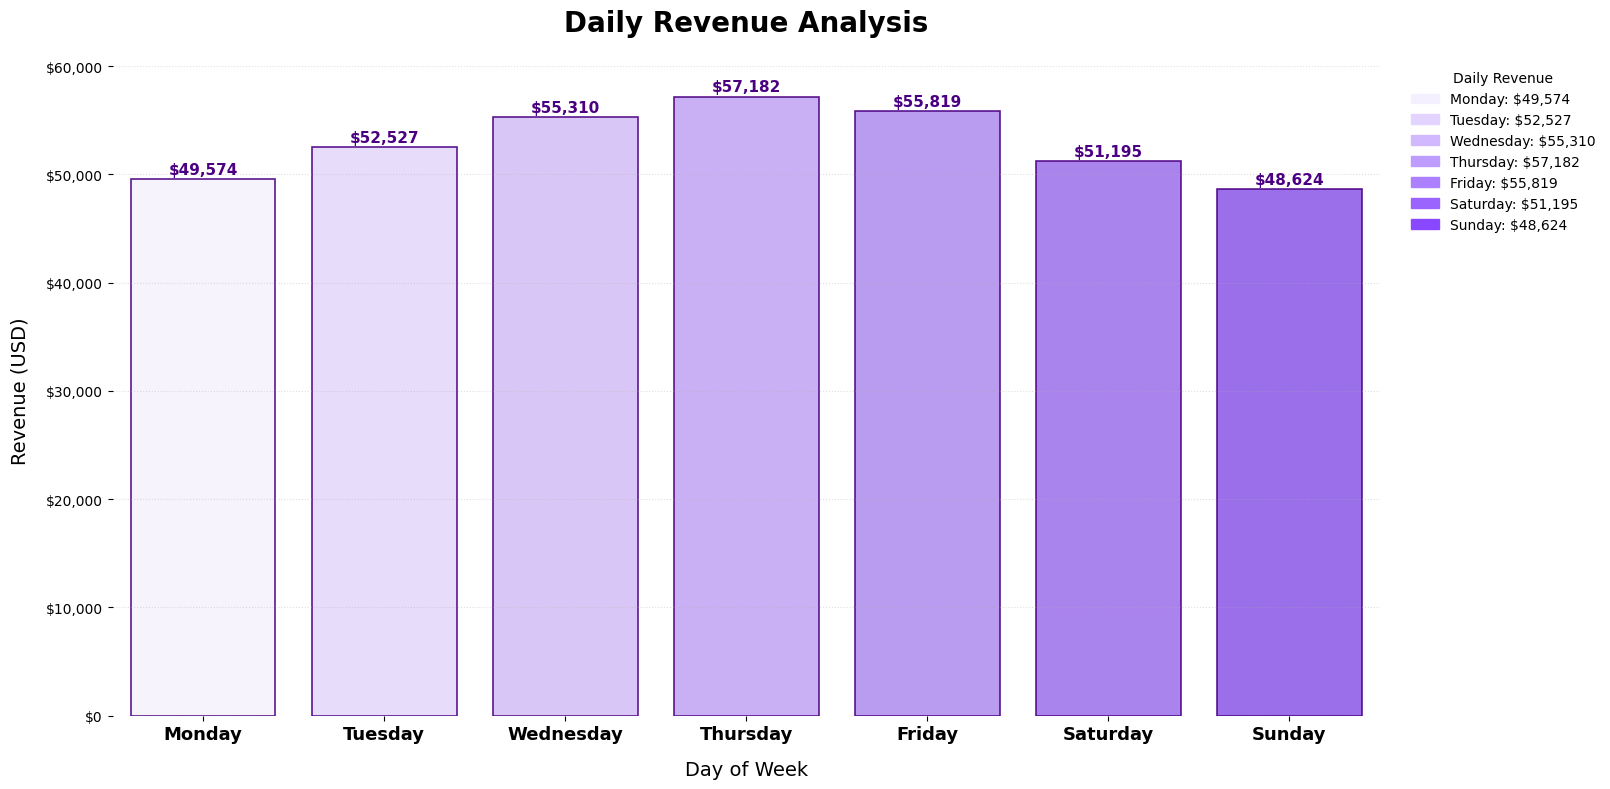

In [49]:
# Create a rich purple-to-violet palette for revenue visualization
revenue_purples = sns.color_palette([
    '#F5F0FF',  # Lightest (Sunday)
    '#E3D4FF',  # Pale lilac
    '#D1B8FF',  # Soft wisteria
    '#BF9CFF',  # Lavender
    '#AD80FF',  # Light violet
    '#9B64FF',  # Bright violet
    '#8948FF'   # Deep violet (Saturday)
], n_colors=7)

plt.figure(figsize=(14,8))
ax = sns.barplot(x=total_amount_day.index, 
                 y=total_amount_day['total_amount'],
                 palette=revenue_purples,
                 edgecolor='#4B0082',
                 linewidth=1.2,
                 alpha=0.9)

# Currency formatting and styling
ax.set_xticklabels(day_order, fontsize=13, fontweight='semibold')
ax.set_ylabel('Revenue (USD)', fontsize=14, labelpad=12)
ax.set_xlabel('Day of Week', fontsize=14, labelpad=12)
plt.title('Daily Revenue Analysis', fontsize=20, pad=25, fontweight='bold')

# Format y-axis as currency
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Add value labels with automatic positioning
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'${height:,.0f}',
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points',
                fontsize=11,
                fontweight='bold',
                color='#4B0082')

# Professional styling
plt.grid(axis='y', linestyle=':', alpha=0.4)
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Add informative legend
legend_patches = [mpatches.Patch(color=revenue_purples[i], 
                                label=f"{day}: ${total_amount_day.iloc[i]['total_amount']:,.0f}") 
                 for i, day in enumerate(day_order)]
plt.legend(handles=legend_patches, 
           title='Daily Revenue',
           bbox_to_anchor=(1.02, 1),
           loc='upper left',
           borderaxespad=0.,
           frameon=False)

plt.show()

In [51]:
# Repeat the process, this time for total revenue by month
total_amount_month = df.groupby('month')[['total_amount']].sum()
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


C:\Users\hp\AppData\Local\Temp\ipykernel_19484\2018160260.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_amount_month.index,
C:\Users\hp\AppData\Local\Temp\ipykernel_19484\2018160260.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month[:3] for month in month_order], fontsize=12)  # Abbreviated month names


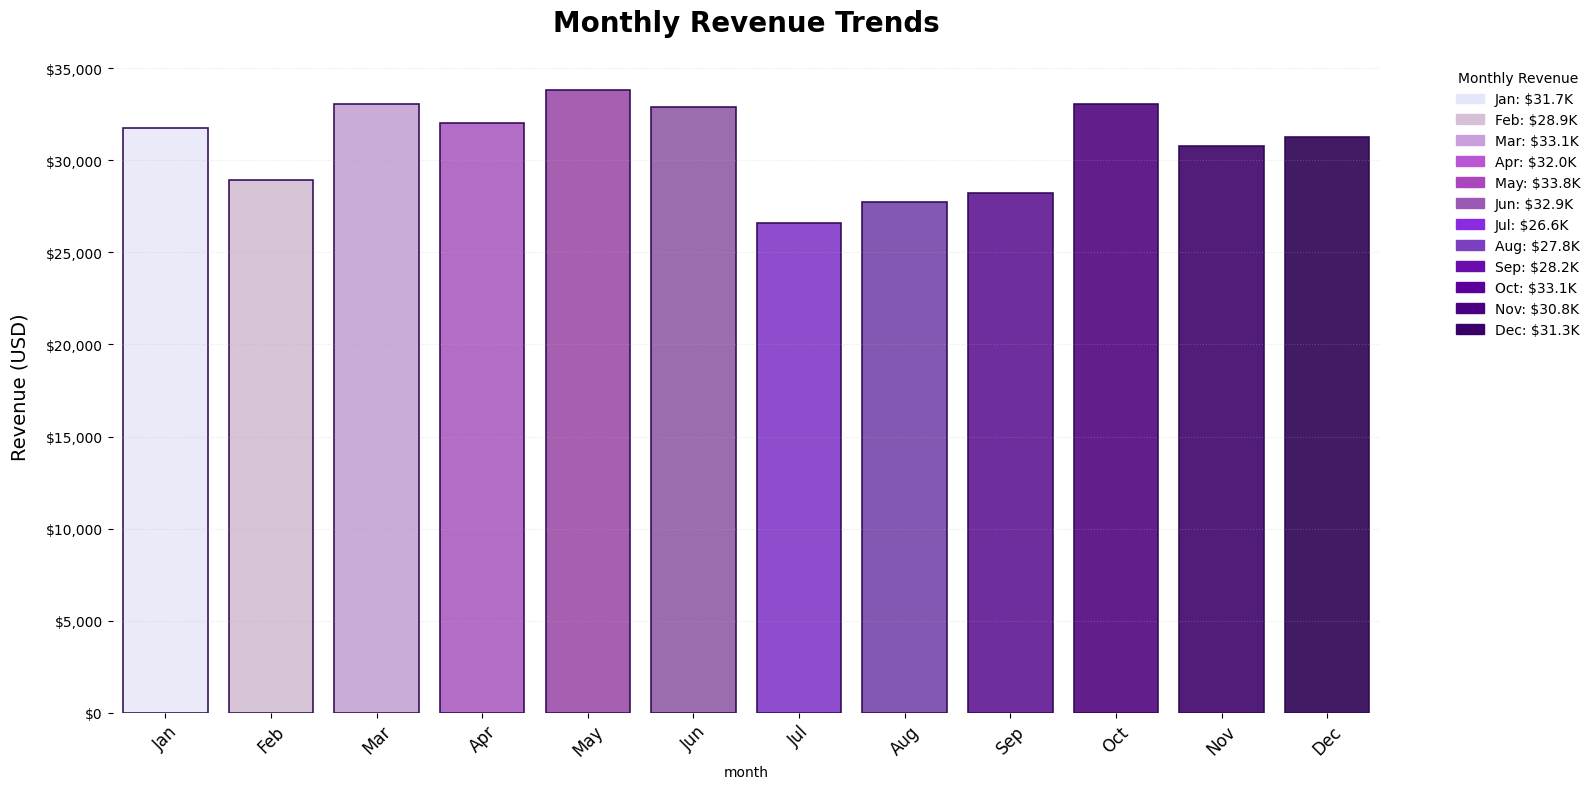

In [ ]:
# Create a seasonal purple palette (lighter in winter, deeper in summer)
monthly_purples = sns.color_palette([
    '#E6E6FA',  # January - Pale lavender (winter)
    '#D8BFD8',  # February - Thistle
    '#C9A0DC',  # March - Wisteria (spring)
    '#BA55D3',  # April - Medium orchid
    '#AB47BC',  # May - Rich lavender
    '#9B59B6',  # June - Amethyst (summer)
    '#8A2BE2',  # July - Blue violet
    '#7B3FBF',  # August - Royal purple
    '#6A0DAD',  # September - Bright violet (fall)
    '#5D0099',  # October - Deep purple
    '#4B0082',  # November - Indigo
    '#3A0069'   # December - Dark indigo (winter)
], n_colors=12)

plt.figure(figsize=(14,8))
ax = sns.barplot(x=total_amount_month.index, 
                 y=total_amount_month['total_amount'],
                 palette=monthly_purples,
                 edgecolor='#2E0854',
                 linewidth=1.2,
                 alpha=0.95)

# Enhanced financial formatting
ax.set_xticklabels([month[:3] for month in month_order], fontsize=12)  # Abbreviated month names
ax.set_ylabel('Revenue (USD)', fontsize=14, labelpad=12)
plt.title('Monthly Revenue Trends', fontsize=20, pad=20, fontweight='bold')

# Format y-axis as proper currency with thousands separator
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Add data labels with automatic positioning
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'${height/1000:,.1f}K' if height >= 10000 else f'${height:,.0f}',
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points',
                fontsize=11,
                fontweight='bold',
                color='white' if height > 0.7*max(total_amount_month['total_amount']) else '#4B0082')

plt.grid(axis='y', linestyle=':', alpha=0.3)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=45)
plt.tight_layout()

import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=monthly_purples[i], 
                                label=f"{month_order[i][:3]}: ${total_amount_month.iloc[i]['total_amount']/1000:,.1f}K") 
                 for i in range(len(month_order))]
plt.legend(handles=legend_patches, 
           title='Monthly Revenue',
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           frameon=False)

plt.show()

In [55]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()


216

In [56]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID')[['trip_distance']].mean()

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff 

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


C:\Users\hp\AppData\Local\Temp\ipykernel_19484\1249383427.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=distance_by_dropoff.index,


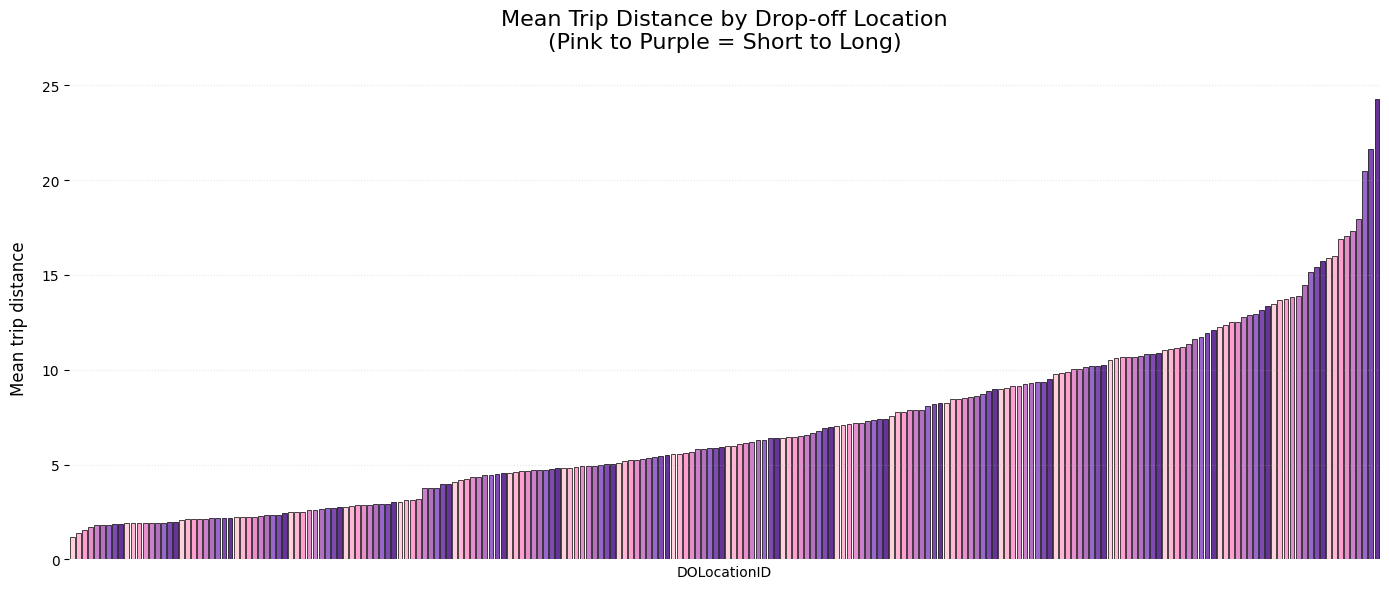

In [70]:
# Create pink-to-purple gradient palette
pink_purple = sns.color_palette([
    '#FFD1DC',  # Light pink
    '#FFB7D5',  # Medium pink
    '#FF9ECF',  # Rich pink
    '#E68FCC',  # Pink-purple
    '#CC80CC',  # Lavender
    '#B370BF',  # Soft purple
    '#9966CC',  # Medium purple
    '#7E4BB3',  # Royal purple
    '#663399'   # Rebecca purple (deep)
], n_colors=len(distance_by_dropoff))

plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index,
                 palette=pink_purple,
                 edgecolor='black',  
                 linewidth=0.5,       
                 saturation=1.0)    

ax.set_xticklabels([])
ax.set_xticks([])
ax.set_ylabel('Mean trip distance', fontsize=12, labelpad=10)
plt.title('Mean Trip Distance by Drop-off Location\n(Pink to Purple = Short to Long)', 
          fontsize=16, pad=20)

ax.yaxis.grid(True, linestyle=':', alpha=0.3)

# Remove all borders
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_19484\3692982804.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='end_id', y='distance', data=data,


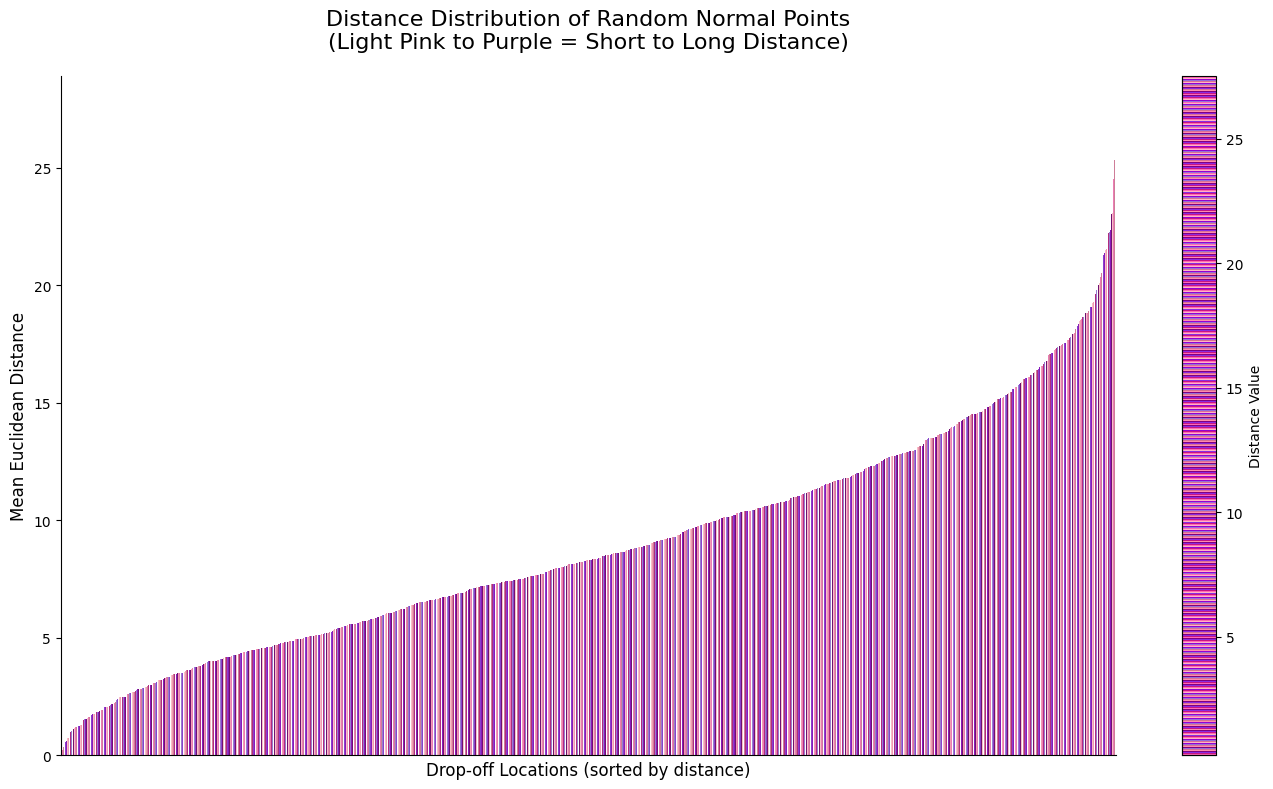

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = len(test) // 2
start = test[:midway]
end = test[midway:]

distances = np.sqrt(((start - end)**2).sum(axis=1))

test_df = pd.DataFrame({
    'start': [tuple(x) for x in start],
    'end': [tuple(x) for x in end],
    'distance': distances
})

test_df['end_id'] = test_df['end'].astype(str)  # Convert coordinates to strings
data = test_df.groupby('end_id')['distance'].mean().sort_values().reset_index()

pink_purple = sns.color_palette([
    '#FFB6C1', '#FF8CAC', '#FF69B4', 
    '#DB7093', '#C71585', '#9370DB',
    '#8A2BE2', '#9400D3', '#800080'
], n_colors=len(data))

plt.figure(figsize=(14,8))
ax = sns.barplot(x='end_id', y='distance', data=data,
                 palette=pink_purple,
                 edgecolor='none',
                 linewidth=0)

# Styling
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Drop-off Locations (sorted by distance)', fontsize=12)
ax.set_ylabel('Mean Euclidean Distance', fontsize=12)
plt.title('Distance Distribution of Random Normal Points\n(Light Pink to Purple = Short to Long Distance)', 
          fontsize=16, pad=20)

norm = plt.Normalize(data['distance'].min(), data['distance'].max())
sm = plt.cm.ScalarMappable(cmap=mpl.colors.ListedColormap(pink_purple), norm=norm)
plt.colorbar(sm, ax=ax, label='Distance Value')

sns.despine()
plt.tight_layout()
plt.show()

In [67]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

np.int64(49)

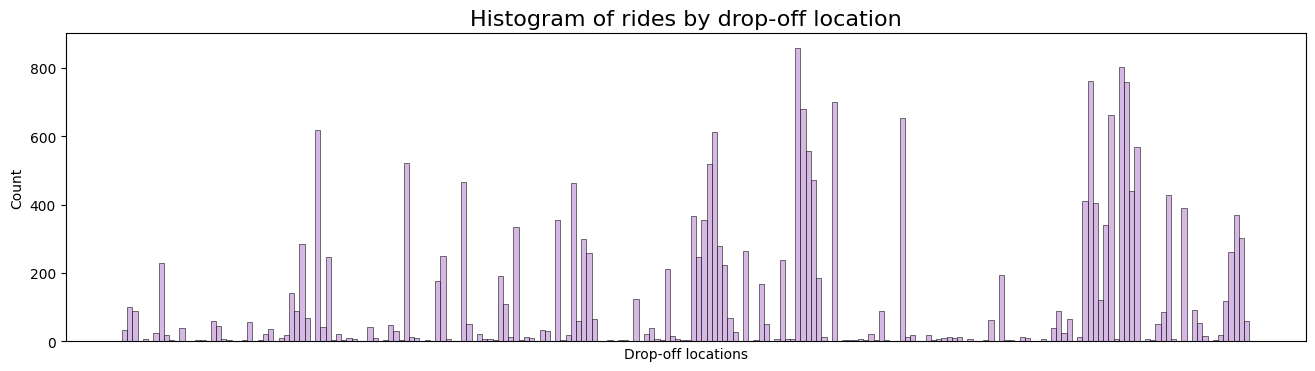

In [69]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1), color='#C9A0DC')
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);